<a href="https://colab.research.google.com/github/esfandia/notebooks/blob/master/manning_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
!python --version
import numpy as np
print(np.version.version)
import matplotlib.pyplot as plt
import pandas as pd
print(pd.__version__)
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
from tensorflow.keras import layers

Python 3.6.9
1.18.5
1.0.5
2.2.0


Pandas exercise

In [36]:
from datetime import date
import random
dates = [date(year, month, 1) for year in range(2018, 2021) for month in range(1,13)]
df= pd.DataFrame({'date': dates})
random1 = [random.randint(0,99) for i in range(0,36)]
df['random1'] = random1
random2 = [random.randint(0,99) for i in range(0,36)]
df['random2'] = random2
df['diff'] = df['random2'] - df['random1']
#print(df)
year1 = df.loc[df['date'] < date(2019,1,1)]
print("year1")
print (year1)
year2 = df.loc[(df['date'] >= date(2019,1,1)) & (df['date'] < date(2020,1,1)) ]
print("year2")
print (year2)
year3 = df.loc[df['date'] >= date(2020,1,1)]
print("year3")
print (year3)

year1
          date  random1  random2  diff
0   2018-01-01       85       30   -55
1   2018-02-01       62       80    18
2   2018-03-01        2       78    76
3   2018-04-01       53       48    -5
4   2018-05-01       93       63   -30
5   2018-06-01       99       12   -87
6   2018-07-01       53        5   -48
7   2018-08-01       31       87    56
8   2018-09-01       14       13    -1
9   2018-10-01        2        8     6
10  2018-11-01       75       14   -61
11  2018-12-01        9       33    24
year2
          date  random1  random2  diff
12  2019-01-01       35       84    49
13  2019-02-01       40       84    44
14  2019-03-01       45       26   -19
15  2019-04-01       71       60   -11
16  2019-05-01       47       47     0
17  2019-06-01       91       27   -64
18  2019-07-01       55       37   -18
19  2019-08-01       86       38   -48
20  2019-09-01       46       96    50
21  2019-10-01       76       73    -3
22  2019-11-01        2       18    16
23  2019-12-0

TensorFlow exercise

In [37]:
# random vector of temperatures
celsius = 50 * np.random.random_sample(20) - 5
s= pd.Series(celsius)
print(s)
df = pd.DataFrame({'celsius': celsius})
df['fahr']= 1.8 * df['celsius'] + 32
print(df)

0      6.132090
1     28.480754
2     28.468992
3     34.241511
4      5.183819
5      4.631985
6     23.665643
7      4.150585
8     41.371269
9     20.506167
10    33.286286
11    20.158265
12    43.546603
13    -4.390534
14    28.271921
15    38.098237
16    25.930182
17    24.629648
18    15.505947
19    -3.975260
dtype: float64
      celsius        fahr
0    6.132090   43.037762
1   28.480754   83.265358
2   28.468992   83.244185
3   34.241511   93.634720
4    5.183819   41.330873
5    4.631985   40.337574
6   23.665643   74.598157
7    4.150585   39.471054
8   41.371269  106.468283
9   20.506167   68.911101
10  33.286286   91.915314
11  20.158265   68.284877
12  43.546603  110.383886
13  -4.390534   24.097039
14  28.271921   82.889458
15  38.098237  100.576826
16  25.930182   78.674327
17  24.629648   76.333367
18  15.505947   59.910705
19  -3.975260   24.844532


Split into training and test sets: from here on, much has been adapted from [Google's tutorial](https://www.tensorflow.org/tutorials/keras/regression) 


In [38]:
train_dataset = df.sample(frac=0.8,random_state=0)
test_dataset = df.drop(train_dataset.index)
print(train_dataset)
print(test_dataset)

      celsius        fahr
18  15.505947   59.910705
1   28.480754   83.265358
19  -3.975260   24.844532
8   41.371269  106.468283
10  33.286286   91.915314
17  24.629648   76.333367
6   23.665643   74.598157
13  -4.390534   24.097039
4    5.183819   41.330873
2   28.468992   83.244185
5    4.631985   40.337574
14  28.271921   82.889458
9   20.506167   68.911101
7    4.150585   39.471054
16  25.930182   78.674327
11  20.158265   68.284877
      celsius        fahr
0    6.132090   43.037762
3   34.241511   93.634720
12  43.546603  110.383886
15  38.098237  100.576826


Split label column into its own tensor

In [39]:
train_labels = train_dataset.pop('fahr')
test_labels = test_dataset.pop('fahr')
print(test_dataset)
print(test_labels)

      celsius
0    6.132090
3   34.241511
12  43.546603
15  38.098237
0      43.037762
3      93.634720
12    110.383886
15    100.576826
Name: fahr, dtype: float64


Build the model

In [40]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    #layers.Dense(64, activation='relu'), #just one layer should do it
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

Build and view the model

In [41]:
model = build_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


Try it out pre-fitting

In [42]:
example_batch = train_dataset[:10]
example_result = model.predict(example_batch)
example_result

array([[ 1.6855255 ],
       [ 3.0959115 ],
       [-0.4039517 ],
       [ 4.4971347 ],
       [ 3.618282  ],
       [ 2.6772888 ],
       [ 2.5725    ],
       [-0.44615018],
       [ 0.5634908 ],
       [ 3.0946329 ]], dtype=float32)

Now learn!

In [43]:
EPOCHS = 500

history = model.fit(
  train_dataset, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[])


Did it learn?

In [44]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
495,119.251534,7.311615,119.251534,172.300735,10.452555,172.300735,495
496,119.122719,7.259012,119.122719,174.629272,10.626316,174.629272,496
497,118.992439,7.303785,118.992439,171.924835,10.441157,171.924835,497
498,118.862923,7.251188,118.862923,174.245926,10.614624,174.245926,498
499,118.731941,7.295887,118.731941,171.548294,10.429793,171.548294,499


How does it perform with the test set?

In [45]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)


1/1 - 0s - loss: 201.9391 - mae: 12.8769 - mse: 201.9391


Make predictions and plot them!

[ 21.366596  99.31191  125.11384  110.00631 ]


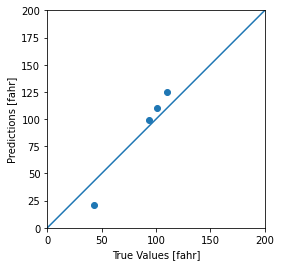

In [46]:
test_predictions = model.predict(test_dataset).flatten()
print(test_predictions)

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [fahr]')
plt.ylabel('Predictions [fahr]')
lims = [0, 200]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
